
Obtenido de:
========================================================<br>
<br>
   File name   : YOLOv3_colab_training.ipynb<br>
   Author      : PyLessons<br>
   Created date: 2020-09-30<br>
   Website     : https://pylessons.com/YOLOv3-TF2-GoogleColab<br>
   GitHub      : https://github.com/pythonlessons/TensorFlow-2.x-YOLOv3<br>
   Description : Train custom model on Google colab tutorial<br>
<br>
================================================================


**Abrir en colab**<br>
**Ir a "Edit" -> "Notebook settings" -> enable GPU**


In [1]:
# Verificar que GPU está activada
!nvidia-smi

Fri Nov 20 19:08:50 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.38       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   69C    P8    11W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

**Conectarse y autorizar a colab a tocar el google drive**

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
!ls

Mounted at /content/gdrive
gdrive	sample_data


In [13]:
%cd MyDrive

/content/gdrive/MyDrive


In [14]:
!git clone https://github.com/pythonlessons/TensorFlow-2.x-YOLOv3.git

Cloning into 'TensorFlow-2.x-YOLOv3'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 737 (delta 0), reused 1 (delta 0), pack-reused 733
Receiving objects: 100% (737/737), 70.75 MiB | 20.48 MiB/s, done.
Resolving deltas: 100% (432/432), done.
Checking out files: 100% (56/56), done.


**Entrar al directorio "TensorFlow-2.x-YOLOv3" en google drive:**





In [17]:
%cd TensorFlow-2.x-YOLOv3


/content/gdrive/My Drive/TensorFlow-2.x-YOLOv3


**Instalar las librerías necesarias:**

In [18]:
!pip install -r ./requirements.txt

     |████████████████████████████████| 320.4MB 53kB/s 
     |████████████████████████████████| 320.4MB 53kB/s 
     |████████████████████████████████| 61kB 9.7MB/s 
     |████████████████████████████████| 3.5MB 48.9MB/s 
     |████████████████████████████████| 81kB 12.2MB/s 
     |████████████████████████████████| 71kB 10.8MB/s 
     |████████████████████████████████| 6.8MB 45.3MB/s 
     |████████████████████████████████| 552kB 55.4MB/s 
  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=50e9fcdd00194fef64f9db357bba52c626cf551092d465646583620206803344
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: botocore 1.19.22 has requirement urllib3<1.27,>=1.25.4; python_version != "3.4", but you'll have urllib3 1.24.3 which is incompatible.
  Found existing installation:

**Descargar los pesoes yolov3.weights:**

In [19]:
!wget -P model_data https://pjreddie.com/media/files/yolov3.weights

--2020-11-20 19:22:35--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘model_data/yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  1.14MB/s    in 3m 55s  

2020-11-20 19:26:31 (1.01 MB/s) - ‘model_data/yolov3.weights’ saved [248007048/248007048]



**Verificar que tensorflow está funcionando con GPU, se ve algo así:**
```
2.3.0
'/device:GPU:0'
```

In [20]:
import tensorflow as tf
print(tf.__version__)
tf.test.gpu_device_name()

2.3.1


'/device:GPU:0'

**Cargamos un modelo:**

In [21]:
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  
import tensorflow as tf
from yolov3.yolov4 import Create_Yolo
from yolov3.utils import load_yolo_weights, detect_image
from yolov3.configs import *

if YOLO_TYPE == "yolov4":
    Darknet_weights = YOLO_V4_TINY_WEIGHTS if TRAIN_YOLO_TINY else YOLO_V4_WEIGHTS
if YOLO_TYPE == "yolov3":
    Darknet_weights = YOLO_V3_TINY_WEIGHTS if TRAIN_YOLO_TINY else YOLO_V3_WEIGHTS

yolo = Create_Yolo(input_size=YOLO_INPUT_SIZE)
load_yolo_weights(yolo, Darknet_weights) # use Darknet weights

**Testeamos en alguna imagen:**

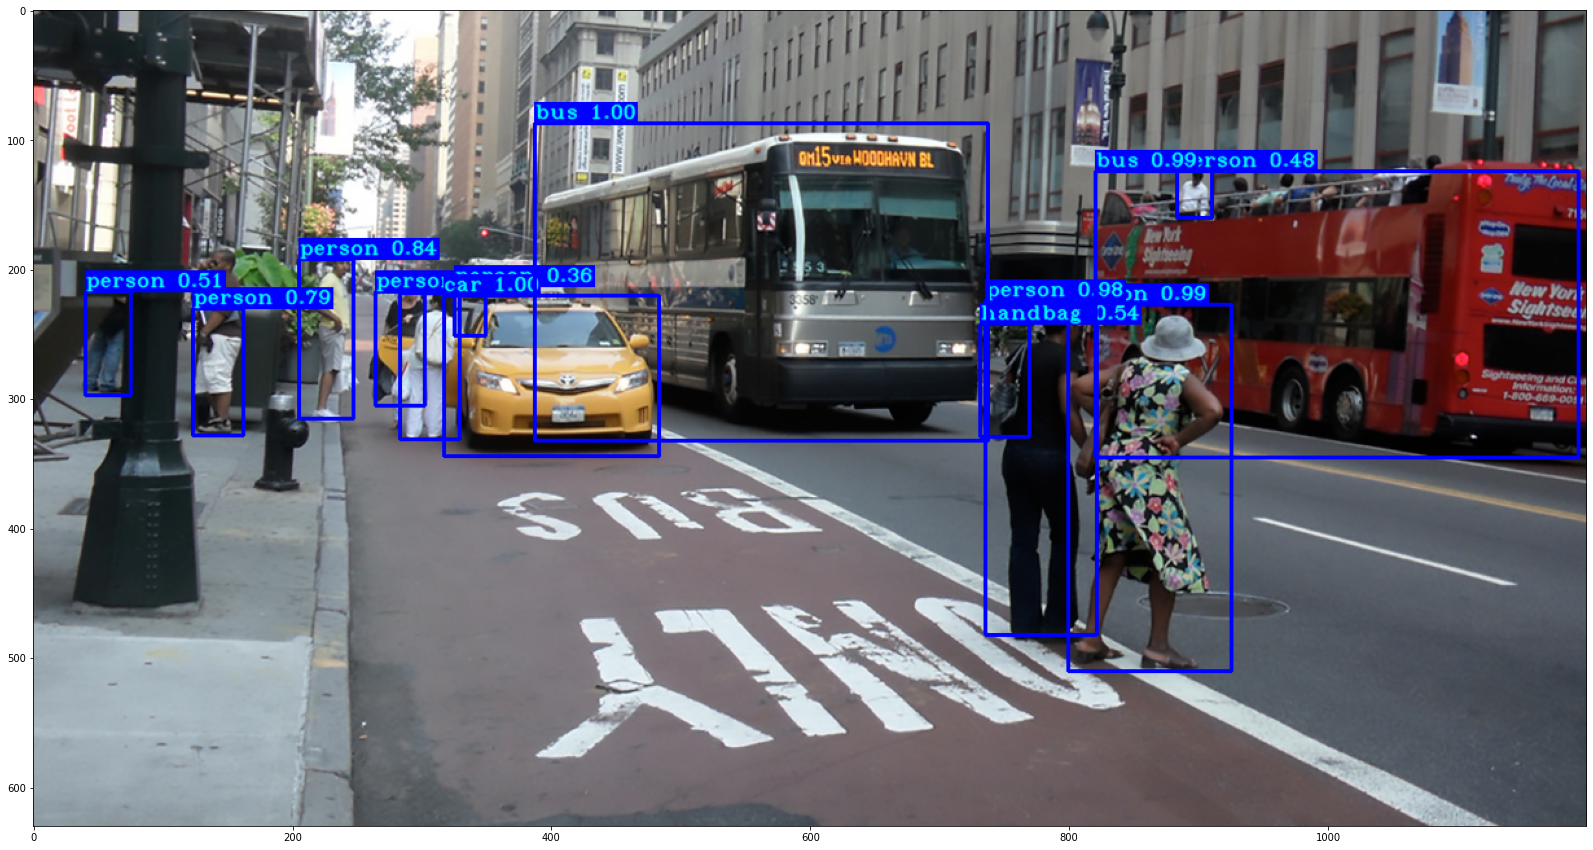

In [22]:
image_path   = "./IMAGES/street.jpg"

image = detect_image(yolo, image_path, '', input_size=YOLO_INPUT_SIZE, show=False, rectangle_colors=(255,0,0))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(30,15))
plt.imshow(image)

In [23]:
!ls ./IMAGES

city.jpg       kite_pred.jpg   street_pred.jpg	tracking_results.gif
city_pred.jpg  mnist_test.jpg  tensorboard.png
kite.jpg       street.jpg      test.mp4


In [25]:
!wget https://futurearchitectureplatform.org//media/cache/8c/d7/8cd727d1617f76c10e3d26988d0fe588.jpg

--2020-11-20 20:03:36--  https://futurearchitectureplatform.org//media/cache/8c/d7/8cd727d1617f76c10e3d26988d0fe588.jpg
Resolving futurearchitectureplatform.org (futurearchitectureplatform.org)... 159.89.212.80
Connecting to futurearchitectureplatform.org (futurearchitectureplatform.org)|159.89.212.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133805 (131K) [image/jpeg]
Saving to: ‘8cd727d1617f76c10e3d26988d0fe588.jpg’

8cd727d1617f76c10e3 100%[===================>] 130.67K   758KB/s    in 0.2s    

2020-11-20 20:03:37 (758 KB/s) - ‘8cd727d1617f76c10e3d26988d0fe588.jpg’ saved [133805/133805]



**Testeamos en cualquier imagen de internet**

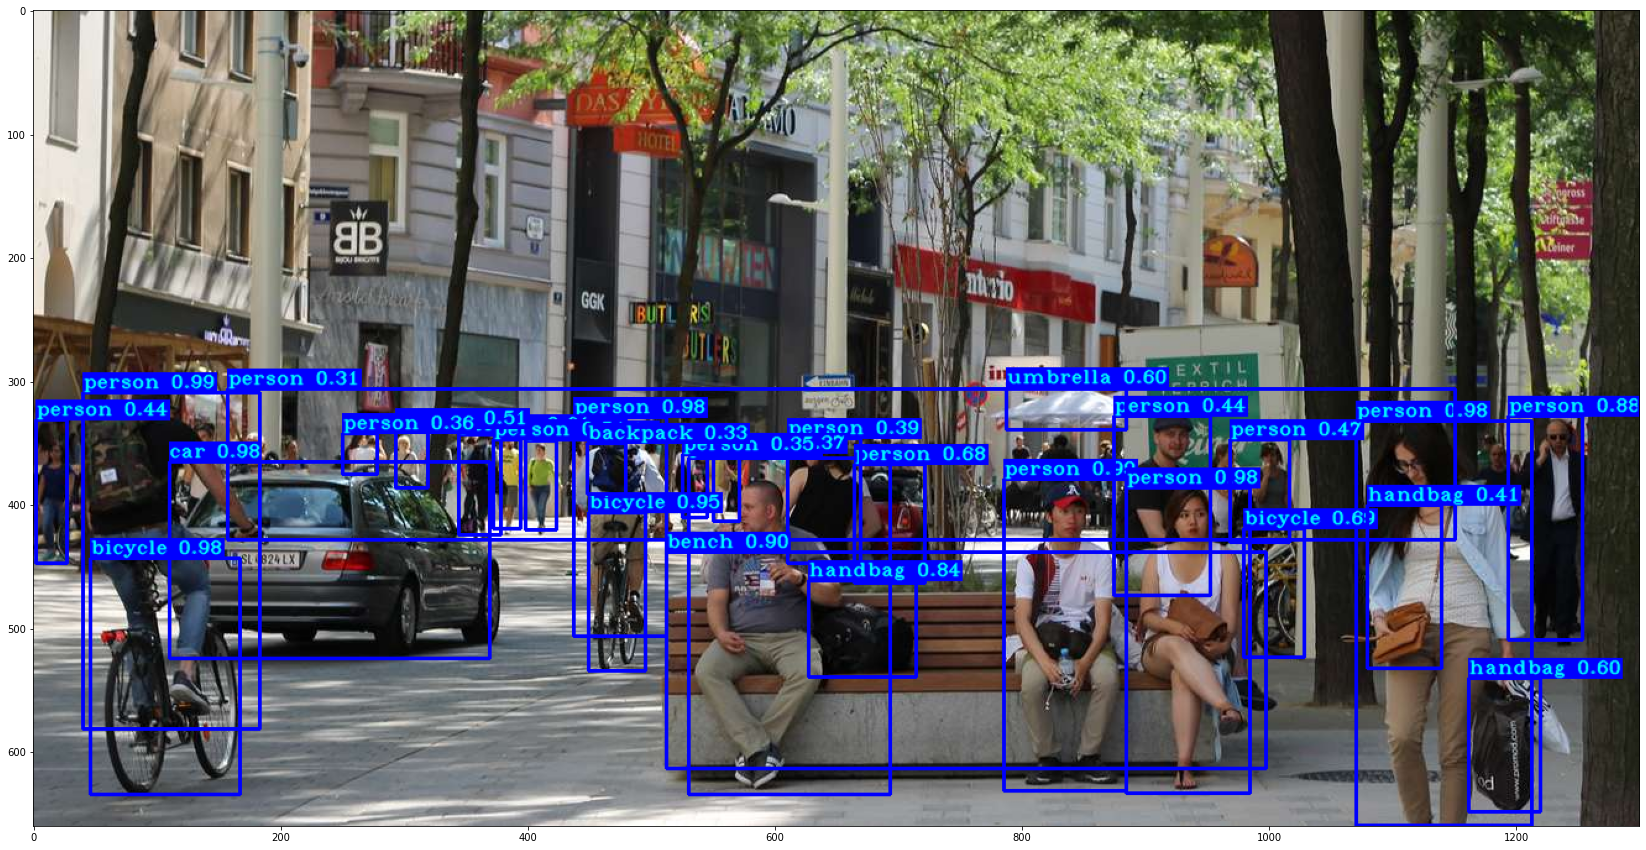

In [26]:
image_path   = "8cd727d1617f76c10e3d26988d0fe588.jpg"

image = detect_image(yolo, image_path, '', input_size=YOLO_INPUT_SIZE, show=False, rectangle_colors=(255,0,0))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(30,15))
plt.imshow(image)

**Run `XML_to_YOLOv3.py` script to convert XML files to YOLOv3 annotations files:**

In [ ]:
!python tools/XML_to_YOLOv3.py

/content/gdrive/My Drive/TensorFlow-2.x-YOLOv3/custom_dataset/train
/content/gdrive/My Drive/TensorFlow-2.x-YOLOv3/custom_dataset/train/1.jpg 650,576,959,749,0
/content/gdrive/My Drive/TensorFlow-2.x-YOLOv3/custom_dataset/train/2.jpg 215,190,409,294,0
/content/gdrive/My Drive/TensorFlow-2.x-YOLOv3/custom_dataset/train/3.jpg 845,429,932,488,0
/content/gdrive/My Drive/TensorFlow-2.x-YOLOv3/custom_dataset/train/4.jpg 71,113,397,220,0
/content/gdrive/My Drive/TensorFlow-2.x-YOLOv3/custom_dataset/train/6.jpg 784,493,944,593,0
/content/gdrive/My Drive/TensorFlow-2.x-YOLOv3/custom_dataset/train/7.jpg 275,215,463,262,0
/content/gdrive/My Drive/TensorFlow-2.x-YOLOv3/custom_dataset/train/8.jpg 323,508,500,609,0
/content/gdrive/My Drive/TensorFlow-2.x-YOLOv3/custom_dataset/train/9.jpg 140,177,238,200,0
/content/gdrive/My Drive/TensorFlow-2.x-YOLOv3/custom_dataset/train/10.jpg 154,126,315,174,0
/content/gdrive/My Drive/TensorFlow-2.x-YOLOv3/custom_dataset/train/dayride_type1_001.mp4#t=754.jpg 506,

**Start training custom model:**

In [ ]:
from train import *
tf.keras.backend.clear_session()
main()

**Create Yolo v3 custom model and load custom trained weights**

In [ ]:
yolo = Create_Yolo(input_size=YOLO_INPUT_SIZE, CLASSES=TRAIN_CLASSES)
yolo.load_weights("./checkpoints/yolov3_custom") # use keras weights

**Test the detection with `IMAGES/plate_2.jpg` image**

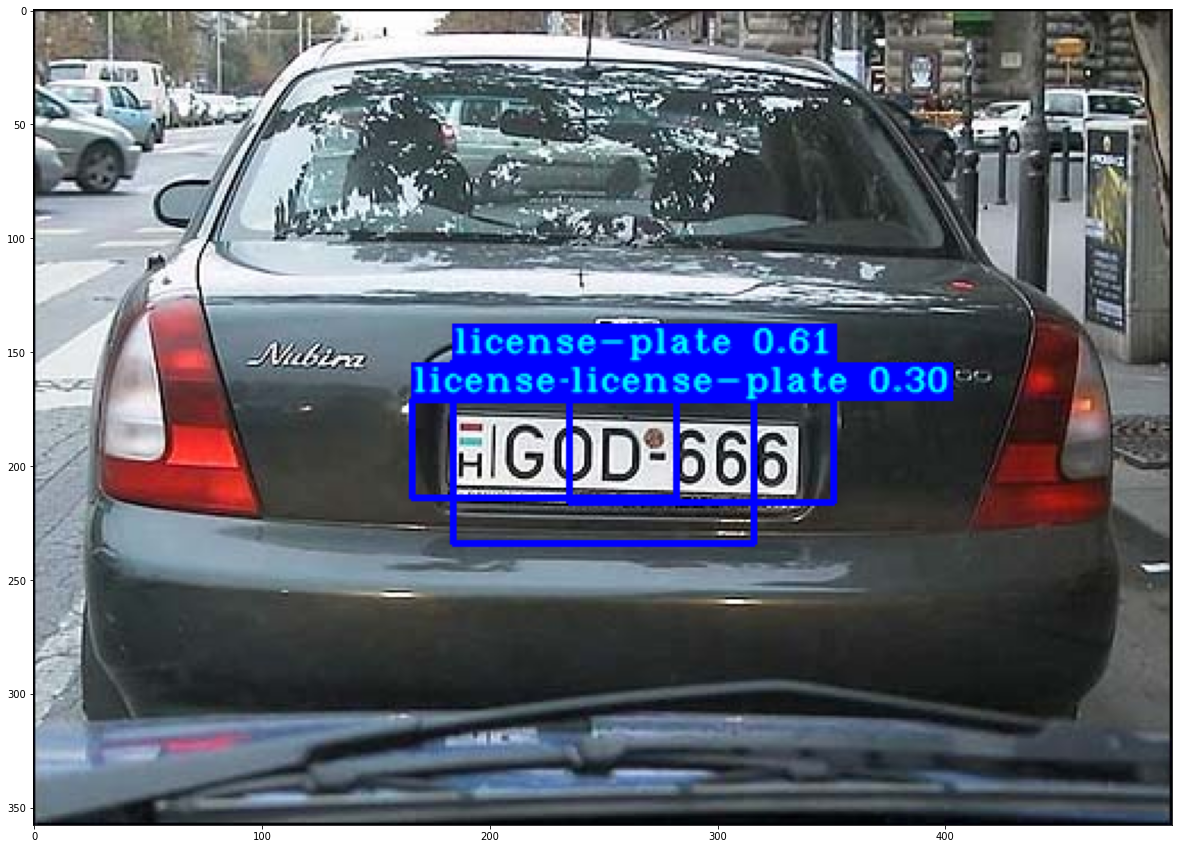

In [ ]:
image_path   = "./IMAGES/plate_1.jpg"
image = detect_image(yolo, image_path, "", input_size=YOLO_INPUT_SIZE, show=False, CLASSES=TRAIN_CLASSES, rectangle_colors=(255,0,0))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(30,15))
plt.imshow(image)

# **You just trained your first Yolo v3 custom object detector on google colab, GOOD JOB!!**